This is a narrative analysis for League of Legends in-game monster Rift Herald.

League of Legends is a MOBA(Multipleplayer Online Battle Arena) game. For deatil about this game, please refer to below link. 
https://en.wikipedia.org/wiki/League_of_Legends

From time to time, League of Legends undergone multiple major patch updates and the game had shifted dramatically since Season 1. On November 11, 2015(Patch V5.22), Rift Herald is introduced to the game as new monster. Please click below link for detail of Rift Herald. 
http://leagueoflegends.wikia.com/wiki/Rift_Herald

The intension of introducing Rift Herald to game is to have an in-game monster that is equivalent to dragons in the ealy game (Before 20 minutes. Rift Herald spawns at the 9:50 mark. If Rift Herald is not taken, it will be despawned permanently at 19:45/19:55). Due to the buff of summoned Rift Herald, it can due 40% of its current health to towers, which can easily take down a tower in early game. 

Taking down a tower early game could lead to shorter game length since the game may finish earlier. Therefore, we will take a look at how the introduction of Rift Herald will influence game length. If we see game length difference between games with taken down Rift Herald and not taken Rift Herald, then we will obtain the average game length of those games, and perform hypothesis analysis. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

# Data Explore

In [2]:
# Read the data set.
df = pd.read_csv('leagueoflegends.csv')

In [3]:
#some basic info about this data set. 
df.head(10)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...
5,NALCS,2015,Spring,Season,DIG,0,1,TIP,24,"[0, 0, 20, -42, -48, -24, -219, -272, -319, -5...",...,Lulu,"[475, 475, 532, 821, 1152, 1493, 1719, 2123, 2...",Apollo,Corki,"[475, 475, 532, 826, 1107, 1422, 1760, 2081, 2...",Adrian,Thresh,"[515, 515, 577, 749, 926, 1081, 1235, 1360, 15...","['Azir', 'RekSai', 'Lissandra']",http://matchhistory.na.leagueoflegends.com/en/...
6,NALCS,2015,Spring,Season,CST,1,0,WFX,39,"[0, 13, -7, 6, -353, -215, -795, -764, 369, 35...",...,Leblanc,"[475, 475, 553, 856, 1157, 1433, 1670, 1990, 2...",Altec,Tristana,"[475, 475, 533, 771, 1102, 1444, 2126, 2450, 2...",Gleeb,Nami,"[515, 520, 589, 764, 937, 1089, 1367, 1509, 16...","['RekSai', 'Gnar', 'Kassadin']",http://matchhistory.na.leagueoflegends.com/en/...
7,NALCS,2015,Spring,Season,TL,1,0,CLG,43,"[0, 0, 26, 91, -109, 264, 178, 66, -65, 206, 5...",...,Leblanc,"[475, 475, 532, 821, 1168, 1393, 1594, 1871, 2...",Doublelift,Sivir,"[475, 475, 532, 761, 1107, 1478, 1746, 2126, 2...",Aphromoo,Blitzcrank,"[515, 515, 577, 718, 871, 995, 1149, 1320, 149...","['Nunu', 'Gnar', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
8,NALCS,2015,Spring,Season,C9,0,1,GV,41,"[0, -10, 0, 162, -269, -63, 323, 225, 274, 624...",...,Zed,"[475, 475, 532, 786, 1052, 1297, 1539, 1898, 2...",Cop,Corki,"[475, 475, 532, 746, 1243, 1610, 1867, 2175, 2...",Bunny FuFuu,Morgana,"[515, 525, 593, 749, 1349, 1504, 1664, 1886, 2...","['Rumble', 'Lissandra', 'Fizz']",http://matchhistory.na.leagueoflegends.com/en/...
9,NALCS,2015,Spring,Season,T8,1,0,TSM,32,"[0, 0, 0, 68, 498, 210, 283, 311, 133, 291, 32...",...,Leblanc,"[475, 475, 532, 856, 1157, 1432, 1700, 2086, 2...",WildTurtle,Graves,"[475, 475, 532, 796, 1147, 1432, 1684, 1972, 2...",Lustboy,Morgana,"[515, 515, 583, 722, 865, 1002, 1201, 1375, 15...","['RekSai', 'JarvanIV', 'Lissandra']",http://matchhistory.na.leagueoflegends.com/en/...


First, we will look at the time frame of this data set. 

In [4]:
# Get the unique attributes in the Year column.
print(df["Year"].unique())
print(df['Year'].value_counts())

[2015 2016 2017 2014 2018]
2017    3311
2016    2494
2015    1496
2018     241
2014      78
Name: Year, dtype: int64


According to above section, the data set contacins League of Legends games from 2014 to 2018. However, this data set only contains 78 games for 2014 and 241 games for 2018, which are a lot less compare to other year. We will find out why later in this report. Next, we will have a general understanding of average game length for each year. 

In [5]:
# Separate the data set based on years. 
season_4 = df.loc[df['Year'] == 2014] 
season_5 = df.loc[df['Year'] == 2015]
season_6 = df.loc[df['Year'] == 2016]
season_7 = df.loc[df['Year'] == 2017]
season_8 = df.loc[df['Year'] == 2018]

In [6]:
avg_gamelen = [season_4['gamelength'].mean(), season_5['gamelength'].mean(), season_6['gamelength'].mean(), season_7['gamelength'].mean(), season_8['gamelength'].mean()]
Yr = ['2014', '2015', '2016', '2017', '2018']

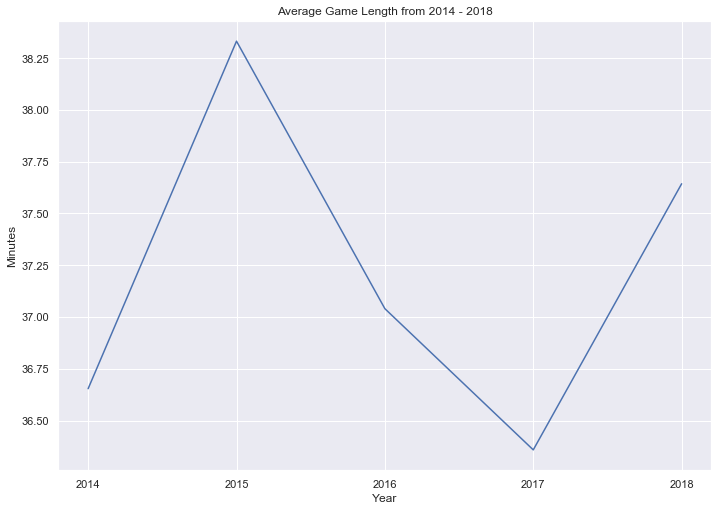

In [7]:
# Line plot to check average game length for each season. 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x=Yr, y=avg_gamelen)
plt.title('Average Game Length from 2014 - 2018')
ax.set(xlabel='Year', ylabel='Minutes')

plt.show()

According to above line plot, the average game length from 2014 to 2018 season varies. It does not show a increasing or descrsing trend over time. Next, we will find out why some 2014 and 2018 game data are missing. 

In [8]:
# Check what kind of games in the season 4 data. 
season_4['Type'].unique()

array(['International'], dtype=object)

Year 2014 data only contains international matchs, but regular season matches and playoff matches are missing. Regular season and playoff games from each regions are major part of the data set for each year. Since only international game data is included in 2014 season, we will not using the 2014 game data for this analysis. Next, we explore the 2018 game data. 

In [9]:
# Check what kind of games in the season 8 data. 
season_8['Type'].unique()

array(['Season', 'Promotion'], dtype=object)

Year 2018 data contains seasonal games and promotion games (from lower league to professional league). However, the number of matches are a lot smaller than 2015, 2016, and 2017. Let's look at 'League" and 'Season' see what matches are played. 

In [10]:
# Check what regions and splits are included in the season 8 data. 
print(season_8['League'].unique())
print(season_8['Season'].unique())

['NALCS' 'EULCS' 'LCK' 'TCL' 'OPL' 'LMS' 'CBLoL' 'CLS']
['Spring']


The 2018 data only contains games from the Spring season. A whole year of game data is consist with Spring season and summer season. The summer season game data and international game data are missing from 2018 data. Therefore, we will not be using the 2018 season game data for this analysis as well. 

# Experiment 1
As mentioned previously, Rift Herald was introduced to the game on on November 11, 2015(Patch V5.22), and this new in-game monster went live on year 2016 (Season 6). The purpose of adding Rift Herald to the game is to have an in-game monster that is equivalent to dragons in the ealy game (before 20 minutes). Rift Herald spawns at the 9:50 mark. If Rift Herald is not taken, it will be despawned permanently at 19:45/19:55. Once Rift Herald is killed by one of the player, it will become an "Eye of Herald" on the ground. Any member of the same team will be able to pickup the "Eye of Herald", and then later summon the Herald to the game. One of the feature for the summoned Herald is the Herald can due 40% damage of its current health to the tower it charged to. This is a lot of damage to the tower for one charge, and it can lead to faster tower falling, and potentially lead to shorter game length. We will run two experiments here.

The first experiment will compare the average game length between 2015 and 2016. 2016 season is the first year that Rift Herald is introduced to the professional league of legends. This experiment will compare the average game length between 2015 season and 2016 season.

Null Hypothesis -> The 2016 season average game length is not shorter than 2015 season average game length. 
Alternative Hypothesis -> The 2016 season average game length is shorter than 2015 season average game length. 
The P-value for the significance test is P=0.05

According to above obtained data, 2016 season contains 2494 games, and 2015 season contains 1496 games. Before the experiment, some basice information is needed to find out why 2016 season have alomost 1000 more games compare to 2015 season. 

In [11]:
# Check regions, type of games, and split of season 5.
print(season_5['League'].unique())
print(season_5['Type'].unique())
print(season_5['Season'].unique())

['NALCS' 'EULCS' 'LCK' 'LMS' 'TCL' 'WC' 'MSI' 'IEM']
['Season' 'Playoffs' 'Regional' 'International' 'Promotion']
['Spring' 'Summer']


In [12]:
# Check regions, type of games, and split of season 6.
print(season_6['League'].unique())
print(season_6['Type'].unique())
print(season_6['Season'].unique())

['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'LJL' 'LCL' 'WC' 'MSI'
 'IEM']
['Season' 'Playoffs' 'Regional' 'International' 'Promotion']
['Spring' 'Summer']


According to above information, 2016 season have 4 additional regions compare to 2015 season. Since the 2015 season does not contain these 4 regions, these 4 regions and their game data will be dropped from the 2016 season game data. 

In [13]:
# Remove extra regions (CBLoL, TCL, OPL, LJL, LCL) from season 6. 
adjusted_season_6 = season_6.loc[season_6['League'].isin(['NALCS', 'EULCS', 'LCK', 'LMS', 'TCL', 'WC', 'MSI', 'IEM'])]

In [14]:
print('Total number of games for 2015 season is ' + str(len(season_5)))
print('The average game length for 2015 season is ' + str(round(season_5['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for 2016 season after removing newly added regions is ' + str(len(adjusted_season_6)))
print('The average game length for 2016 season is ' + str(round(adjusted_season_6['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for 2015 season is ' + str(season_5['gamelength'].var()))
print('The variance of game length for 2016 season is ' + str(adjusted_season_6['gamelength'].var()))

stats.ttest_ind(season_5['gamelength'], adjusted_season_6['gamelength'], equal_var=False)

Total number of games for 2015 season is 1496
The average game length for 2015 season is 38.33 minutes.
Total number of games for 2016 season after removing newly added regions is 1881
The average game length for 2016 season is 37.01 minutes.

The variance of game length for 2015 season is 60.41709083755111
The variance of game length for 2016 season is 65.28387967016207


Ttest_indResult(statistic=4.812570909123692, pvalue=1.557776160071502e-06)

Accoridng to above information, both 2015 season and 2016 season have a high variance for game length. The 2016 average game length is 37.01 minutes, which is 1.32 minutes shorter than the 2015 season. stats.ttest_ind is used here because we are calculating the T-test for the means of two independent samples of scores. Also, these two independent samples does not have equal variances. Therefore, equal_var is False. According to the T-test, the P-value is 1.557776160071502e-06, and this P-value is smaller than 0.05. The Null Hypothesis is rejected, which the 2016 season average game length is shorter than 2015 season average game length. 

Even though the Null Hypothesis is rejected, this is a test for 2015 season and 2016 season as a whole. What if the 2015 season and 2016 season are break down into regions? Does each regions follow the same T-test result?

In [15]:
# Separate data set into regions for each year. 
NALCS_2015 = season_5.loc[season_5['League'] == 'NALCS']
EULCS_2015 = season_5.loc[season_5['League'] == 'EULCS']
LCK_2015 = season_5.loc[season_5['League'] == 'LCK']
LMS_2015 = season_5.loc[season_5['League'] == 'LMS']
TCL_2015 = season_5.loc[season_5['League'] == 'TCL']
WC_2015 = season_5.loc[season_5['League'] == 'WC']
MSI_2015 = season_5.loc[season_5['League'] == 'MSI']
IEM_2015 = season_5.loc[season_5['League'] == 'IEM']

NALCS_2016 = season_6.loc[season_6['League'] == 'NALCS']
EULCS_2016 = season_6.loc[season_6['League'] == 'EULCS']
LCK_2016 = season_6.loc[season_6['League'] == 'LCK']
LMS_2016 = season_6.loc[season_6['League'] == 'LMS']
TCL_2016 = season_6.loc[season_6['League'] == 'TCL']
WC_2016 = season_6.loc[season_6['League'] == 'WC']
MSI_2016 = season_6.loc[season_6['League'] == 'MSI']
IEM_2016 = season_6.loc[season_6['League'] == 'IEM']

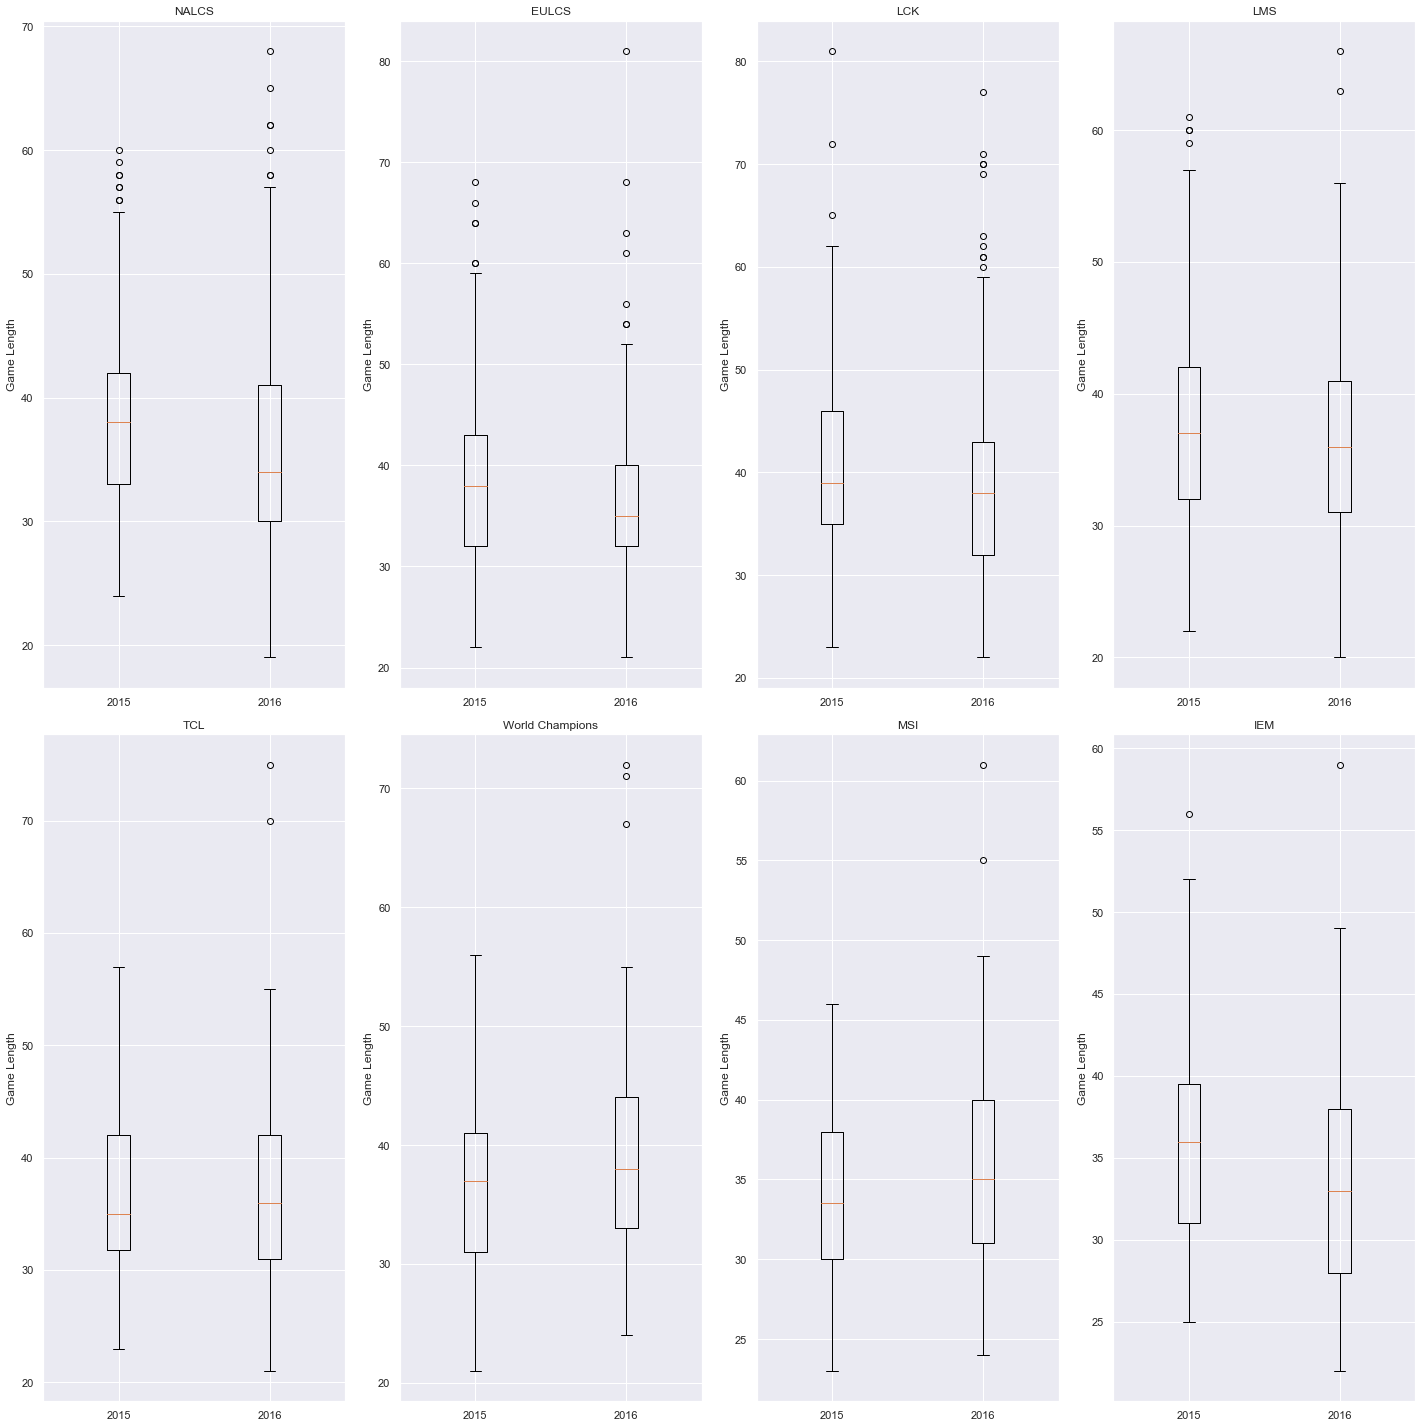

In [16]:
fig = plt.figure(figsize=(20, 20)) # Figure Size
G = gridspec.GridSpec(2, 4) # create grid

axes_1 = plt.subplot(G[0, 0]) # Assign grid position
axes_1.boxplot([NALCS_2015['gamelength'], NALCS_2016['gamelength']], meanline=True)
plt.setp(axes_1, xticks=[1,2], xticklabels=['2015','2016'])
axes_1.set_ylabel('Game Length')
axes_1.set_title('NALCS')


axes_2 = plt.subplot(G[0, 1])
axes_2.boxplot([EULCS_2015['gamelength'], EULCS_2016['gamelength']], meanline=True)
plt.setp(axes_2, xticks=[1,2], xticklabels=['2015','2016'])
axes_2.set_ylabel('Game Length')
axes_2.set_title('EULCS')

axes_3 = plt.subplot(G[0, 2])
axes_3.boxplot([LCK_2015['gamelength'], LCK_2016['gamelength']], meanline=True)
plt.setp(axes_3, xticks=[1,2], xticklabels=['2015','2016'])
axes_3.set_ylabel('Game Length')
axes_3.set_title('LCK')

axes_4 = plt.subplot(G[0, 3])
axes_4.boxplot([LMS_2015['gamelength'], LMS_2016['gamelength']], meanline=True)
plt.setp(axes_4, xticks=[1,2], xticklabels=['2015','2016'])
axes_4.set_ylabel('Game Length')
axes_4.set_title('LMS')

axes_5 = plt.subplot(G[1, 0])
axes_5.boxplot([TCL_2015['gamelength'], TCL_2016['gamelength']], meanline=True)
plt.setp(axes_5, xticks=[1,2], xticklabels=['2015','2016'])
axes_5.set_ylabel('Game Length')
axes_5.set_title('TCL')

axes_6 = plt.subplot(G[1, 1])
axes_6.boxplot([WC_2015['gamelength'], WC_2016['gamelength']], meanline=True)
plt.setp(axes_6, xticks=[1,2], xticklabels=['2015','2016'])
axes_6.set_ylabel('Game Length')
axes_6.set_title('World Champions')

axes_7 = plt.subplot(G[1, 2])
axes_7.boxplot([MSI_2015['gamelength'], MSI_2016['gamelength']], meanline=True)
plt.setp(axes_7, xticks=[1,2], xticklabels=['2015','2016'])
axes_7.set_ylabel('Game Length')
axes_7.set_title('MSI')

axes_8 = plt.subplot(G[1, 3])
axes_8.boxplot([IEM_2015['gamelength'], IEM_2016['gamelength']], meanline=True)
plt.setp(axes_8, xticks=[1,2], xticklabels=['2015','2016'])
axes_8.set_ylabel('Game Length')
axes_8.set_title('IEM')

plt.tight_layout()
plt.show()

Above box plots provide a basic understanding of game length for 2015 and 2016 seasons in different regions. For major regions like NALCS, EULCS, LCK, and LMS, the 2016 season average game length are shorter than 2015 season game length. Also, these four major regions seems to have more outliners compare to smaller regions. 

In [17]:
# Compare each region individualy. 
print('Total number of games for NALCS 2015 season is ' + str(len(NALCS_2015)))
print('The average game length for NALCS 2015 season is ' + str(round(NALCS_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for NALCS 2016 season  is ' + str(len(NALCS_2016)))
print('The average game length for NALCS 2016 season is ' + str(round(NALCS_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for NALCS 2015 season is ' + str(NALCS_2015['gamelength'].var()))
print('The variance of game length for NALCS 2016 season is ' + str(NALCS_2016['gamelength'].var()))
print(stats.ttest_ind(NALCS_2015['gamelength'], NALCS_2016['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for EULCS 2015 season is ' + str(len(EULCS_2015)))
print('The average game length for EULCS 2015 season is ' + str(round(EULCS_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for EULCS 2016 season  is ' + str(len(EULCS_2016)))
print('The average game length for EULCS 2016 season is ' + str(round(EULCS_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for EULCS is ' + str(EULCS_2015['gamelength'].var()))
print('The variance of game length for EULCS is ' + str(EULCS_2016['gamelength'].var()))
print(stats.ttest_ind(EULCS_2015['gamelength'], EULCS_2016['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for LCK 2015 season is ' + str(len(LCK_2015)))
print('The average game length for LCK 2015 season is ' + str(round(LCK_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for LCK 2016 season  is ' + str(len(LCK_2016)))
print('The average game length for LCK 2016 season is ' + str(round(LCK_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance for game length for LCK 2015 season is ' + str(LCK_2015['gamelength'].var()))
print('The variance for game length for LCK 2016 season is ' + str(LCK_2016['gamelength'].var()))
print(stats.ttest_ind(LCK_2015['gamelength'], LCK_2016['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for LMS 2015 season is ' + str(len(LMS_2015)))
print('The average game length for LMS 2015 season is ' + str(round(LMS_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for LMS 2016 season  is ' + str(len(LMS_2016)))
print('The average game length for LMS 2016 season is ' + str(round(LMS_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for LMS 2015 season is ' + str(LMS_2015['gamelength'].var()))
print('The variance of game length for LMS 2016 season is ' + str(LMS_2016['gamelength'].var()))
print(stats.ttest_ind(LMS_2015['gamelength'], LMS_2016['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for TCL 2015 season is ' + str(len(TCL_2015)))
print('The average game length for TCL 2015 season is ' + str(round(TCL_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for TCL 2016 season  is ' + str(len(TCL_2016)))
print('The average game length for TCL 2016 season is ' + str(round(TCL_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for TCL 2015 season is ' + str(TCL_2015['gamelength'].var()))
print('The variance of game length for TCL 2016 season is ' + str(TCL_2016['gamelength'].var()))
print(stats.ttest_ind(TCL_2015['gamelength'], TCL_2016['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for World Championship 2015 season is ' + str(len(WC_2015)))
print('The average game length for World Championship 2015 season is ' + str(round(WC_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for World Championship 2016 season  is ' + str(len(WC_2016)))
print('The average game length for World Championship 2016 season is ' + str(round(WC_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for World Championship 2015 season is ' + str(WC_2015['gamelength'].var()))
print('The variance of game length for World Championship 2016 season is ' + str(WC_2016['gamelength'].var()))
print(stats.ttest_ind(WC_2015['gamelength'], WC_2016['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for MSI 2015 season is ' + str(len(MSI_2015)))
print('The average game length for MSI 2015 season is ' + str(round(MSI_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for MSI 2016 season  is ' + str(len(MSI_2016)))
print('The average game length for MSI 2016 season is ' + str(round(MSI_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for MSI 2015 season is ' + str(MSI_2015['gamelength'].var()))
print('The variance of game length for MSI 2016 season is ' + str(MSI_2016['gamelength'].var()))
print(stats.ttest_ind(MSI_2015['gamelength'], MSI_2016['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for IEM 2015 season is ' + str(len(IEM_2015)))
print('The average game length for IEM 2015 season is ' + str(round(IEM_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for IEM 2016 season  is ' + str(len(IEM_2016)))
print('The average game length for IEM 2016 season is ' + str(round(IEM_2016['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of game length for IEM 2015 season is ' + str(IEM_2015['gamelength'].var()))
print('The variance of game length for IEM 2016 season is ' + str(IEM_2016['gamelength'].var()))
print(stats.ttest_ind(IEM_2015['gamelength'], IEM_2016['gamelength'], equal_var=False))

Total number of games for NALCS 2015 season is 307
The average game length for NALCS 2015 season is 38.4 minutes.
Total number of games for NALCS 2016 season  is 385
The average game length for NALCS 2016 season is 35.89 minutes.

The variance of game length for NALCS 2015 season is 51.20823486832302
The variance of game length for NALCS 2016 season is 61.06098484848477
Ttest_indResult(statistic=4.399658980020216, pvalue=1.2592229258277775e-05)


Total number of games for EULCS 2015 season is 299
The average game length for EULCS 2015 season is 38.3 minutes.
Total number of games for EULCS 2016 season  is 358
The average game length for EULCS 2016 season is 36.4 minutes.

The variance of game length for EULCS is 63.58694529864629
The variance of game length for EULCS is 55.130745035444356
Ttest_indResult(statistic=3.1449598707414976, pvalue=0.0017410644995224135)


Total number of games for LCK 2015 season is 393
The average game length for LCK 2015 season is 40.41 minutes.
Total numbe

According to above information, NALCS, EULCS, and LCK regions rejected the Null Hypothesis, which the 2016 season have a shorter average game length compare to 2015 season. For the other regions, the Null Hypothesis is accepted, which the 2016 season average game length is not shorter than the 2015 season. For regions like LMS, TCL, World Championship series, MSI, and IEM, these game data have a relatively smaller sample size compare to NALCS, EULCS, and LCK. Larger sample size tends to result in a smaller P-value. Also, larger P-value tends to result in a smaller T-value. Even thought larger sample size like 2015 season and 2016 season data set as a whole suggests to reject the Null Hypothesis, smaller sampler size like smaller regions suggest to accept the Null Hypothesis. It may lead to a suggestion that we rejected a true Null Hypothesis for larger data set, which is a Type I error. Further study and researc is required for this topic. For now, we will stick with our result when we look at the whole data set. 

# Experiment 2

The 2016 season is the first season that introduced the new in-game monster Rift Herald. As mentioned previously, both team can choose to kill this monster, or not kill the monster and let it despawned permanently at 19:45/19:55 minute mark during the game. Therefore, there are games in the 2016 season that both teams did not kill the Rift Herald. The purpose of this experiment is to see if killing the Rift Herald will shorten the game length compare to those games not killing the Rift Herald at the 2016 season. A Hypothesis analysis will be performed for this experiment as well. Below is the Null Hypothesis and the Alternative Hypothesis. 

Null Hypothesis -> For 2016 season, the games that killed the Rift Herald do not have a shorter average game length than games did not kill the Rift Herald. 
Alternative Hypothesis -> For 2016 season, the games that killed the Rift Herald have a shroter average game length than games did not kill the Rift Herald.
The P-value for the significance test is P=0.05

In [18]:
# Separate Season 6 games into games did not kill Rift Herald and games killed Rift Herald. 
season_6_no_herald = season_6.loc[(season_6['bHeralds'] == '[]') & (season_6['rHeralds'] == '[]')]
season_6_killed_herald = season_6.loc[(season_6['bHeralds'] != '[]') | (season_6['rHeralds'] != '[]')]

In [19]:
# Perform the hypothesis analysis for the overall 2016 season. 
print('Total number of games for 2016 season that both team did not kill the Rift Heralds is ' + str(len(season_6_no_herald)))
print('The average game length for 2016 season that both team did not killed the Rift Heralds is ' + str(round(season_6_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for 2016 season that either team killed the Rift Heralds is ' + str(len(season_6_killed_herald)))
print('The average game length for 2016 season that either team killed the Rift Heralds is ' + str(round(season_6_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance of 2016 season that both team did not kill the Rift Herald is ' + str(season_6_no_herald['gamelength'].var()))
print('The variance of 2016 season that either team killed the Rift Herald is ' + str(season_6_killed_herald['gamelength'].var()))
stats.ttest_ind(season_6_no_herald['gamelength'], season_6_killed_herald['gamelength'], equal_var=False)

Total number of games for 2016 season that both team did not kill the Rift Heralds is 772
The average game length for 2016 season that both team did not killed the Rift Heralds is 38.01 minutes.
Total number of games for 2016 season that either team killed the Rift Heralds is 1722
The average game length for 2016 season that either team killed the Rift Heralds is 36.6 minutes.

The variance of 2016 season that both team did not kill the Rift Herald is 64.11011034723765
The variance of 2016 season that either team killed the Rift Herald is 65.31068255025549


Ttest_indResult(statistic=4.045687759831853, pvalue=5.4831731505842964e-05)

Accoridng to above information, games killed Rift Herald and games did not kill Rift Herald have a high variance for game length. Games that killed the Rift Herald have an average game length of 36.6 minutes, which is 1.41 minutes compare to games that did not kill the Rift Herald. stats.ttest_ind is used here because we are calculating the T-test for the means of two independent samples of scores.Also, these two independent samples does not have equal variances. Therefore, equal_var is False. According to the T-test, the P-value is 5.4831731505842964e-05, and this P-value is smaller than 0.05. The Null Hypothesis is rejected. For 2016 season, the games that killed the Rift Herald have a shorter average game length than games did not kill the Rift Herald. 

Again, the Null Hypothesis is rejected for the overall 2016 season data set. The same T-test will be performed for different regions in the 2016 season. 

In [20]:
# Separate the data set into regions. 
NALCS_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'NALCS']
EULCS_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'EULCS']
LCK_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LCK']
LMS_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LMS']
TCL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'TCL']
CBLoL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'CBLoL']
OPL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'OPL']
LJL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LJL']
LCL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LCL']
WC_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'WC']
MSI_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'MSI']
IEM_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'IEM']

NALCS_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'NALCS']
EULCS_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'EULCS']
LCK_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LCK']
LMS_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LMS']
TCL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'TCL']
CBLoL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'CBLoL']
OPL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'OPL']
LJL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LJL']
LCL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LCL']
WC_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'WC']
MSI_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'MSI']
IEM_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'IEM']

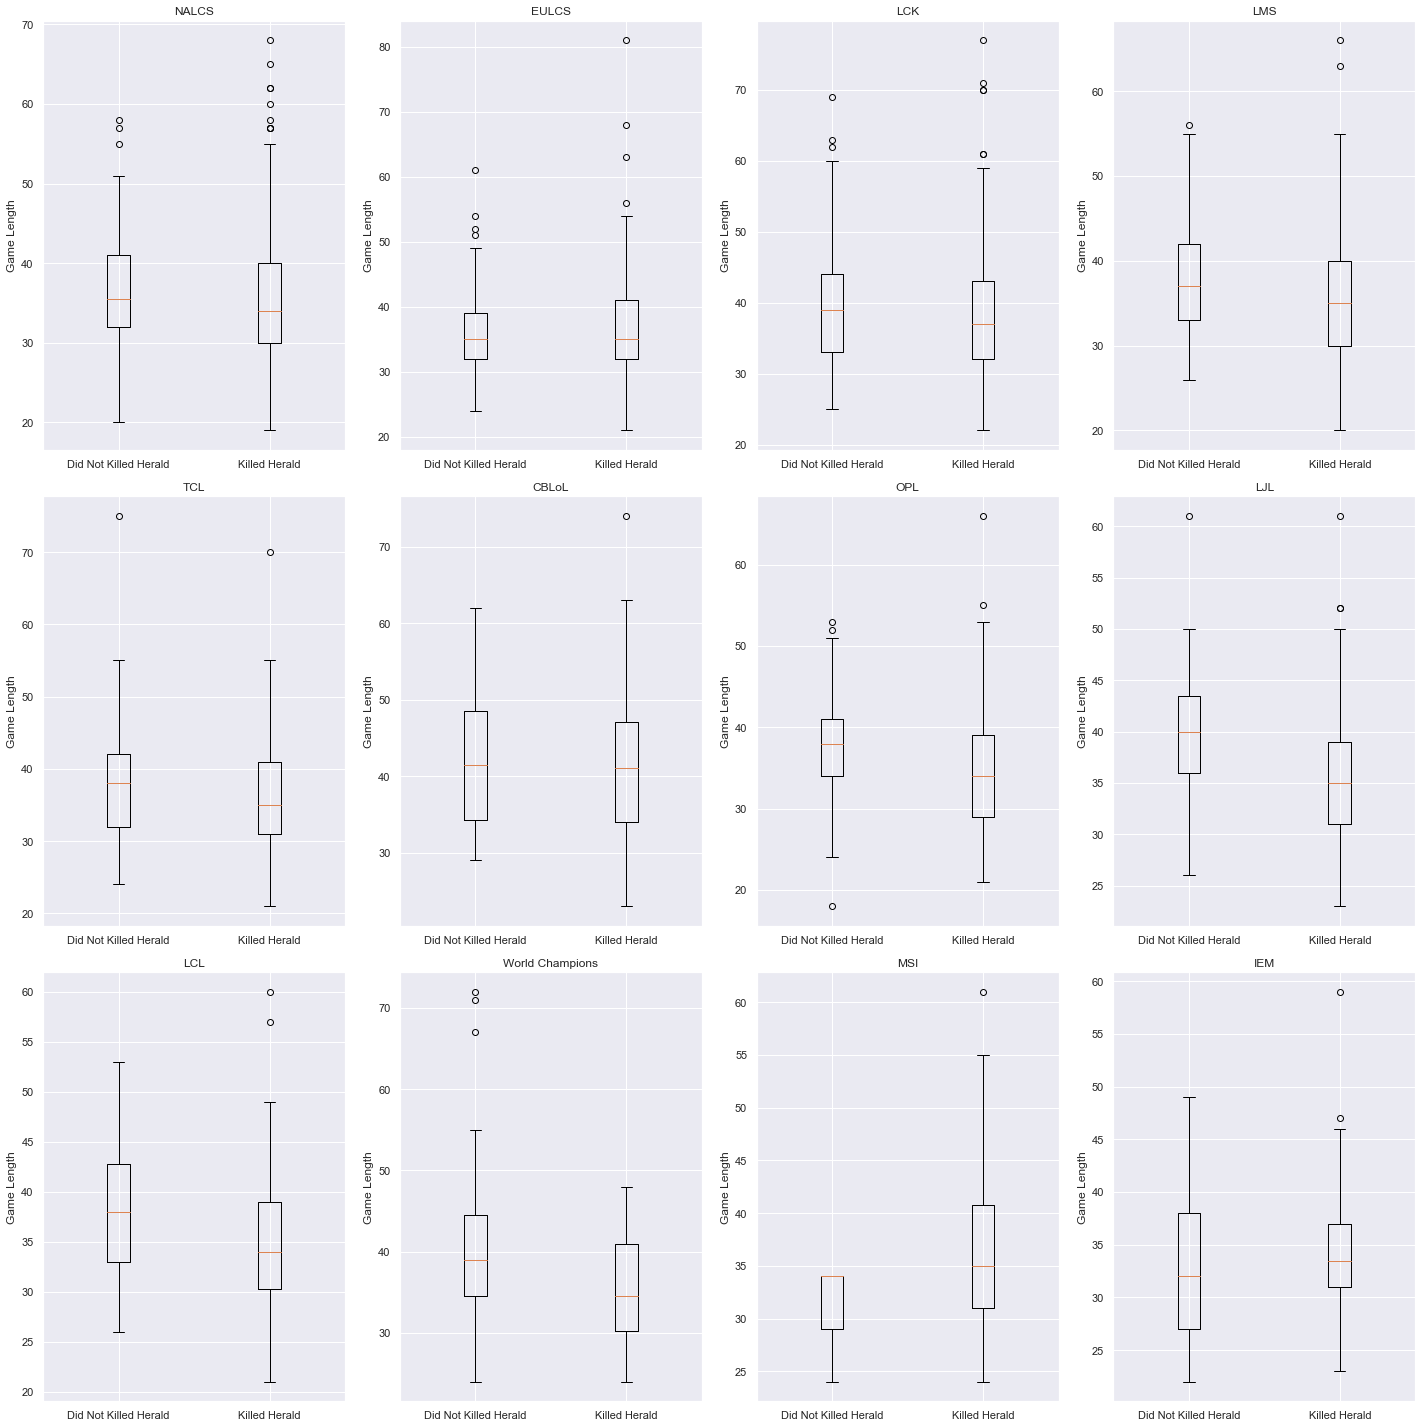

In [21]:
fig = plt.figure(figsize=(20, 20))
G = gridspec.GridSpec(3, 4)

axes_1 = plt.subplot(G[0, 0])
axes_1.boxplot([NALCS_no_herald['gamelength'], NALCS_killed_herald['gamelength']], meanline=True)
plt.setp(axes_1, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_1.set_ylabel('Game Length')
axes_1.set_title('NALCS')


axes_2 = plt.subplot(G[0, 1])
axes_2.boxplot([EULCS_no_herald['gamelength'], EULCS_killed_herald['gamelength']], meanline=True)
plt.setp(axes_2, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_2.set_ylabel('Game Length')
axes_2.set_title('EULCS')

axes_3 = plt.subplot(G[0, 2])
axes_3.boxplot([LCK_no_herald['gamelength'], LCK_killed_herald['gamelength']], meanline=True)
plt.setp(axes_3, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_3.set_ylabel('Game Length')
axes_3.set_title('LCK')

axes_4 = plt.subplot(G[0, 3])
axes_4.boxplot([LMS_no_herald['gamelength'], LMS_killed_herald['gamelength']], meanline=True)
plt.setp(axes_4, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_4.set_ylabel('Game Length')
axes_4.set_title('LMS')

axes_5 = plt.subplot(G[1, 0])
axes_5.boxplot([TCL_no_herald['gamelength'], TCL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_5, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_5.set_ylabel('Game Length')
axes_5.set_title('TCL')

axes_6 = plt.subplot(G[1, 1])
axes_6.boxplot([CBLoL_no_herald['gamelength'], CBLoL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_6, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_6.set_ylabel('Game Length')
axes_6.set_title('CBLoL')

axes_7 = plt.subplot(G[1, 2])
axes_7.boxplot([OPL_no_herald['gamelength'], OPL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_7, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_7.set_ylabel('Game Length')
axes_7.set_title('OPL')

axes_8 = plt.subplot(G[1, 3])
axes_8.boxplot([LJL_no_herald['gamelength'], LJL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_8, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_8.set_ylabel('Game Length')
axes_8.set_title('LJL')

axes_9 = plt.subplot(G[2, 0])
axes_9.boxplot([LCL_no_herald['gamelength'], LCL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_9, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_9.set_ylabel('Game Length')
axes_9.set_title('LCL')

axes_10 = plt.subplot(G[2, 1])
axes_10.boxplot([WC_no_herald['gamelength'], WC_killed_herald['gamelength']], meanline=True)
plt.setp(axes_10, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_10.set_ylabel('Game Length')
axes_10.set_title('World Champions')

axes_11 = plt.subplot(G[2, 2])
axes_11.boxplot([MSI_no_herald['gamelength'], MSI_killed_herald['gamelength']], meanline=True)
plt.setp(axes_11, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_11.set_ylabel('Game Length')
axes_11.set_title('MSI')

axes_12 = plt.subplot(G[2, 3])
axes_12.boxplot([IEM_no_herald['gamelength'], IEM_killed_herald['gamelength']], meanline=True)
plt.setp(axes_12, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_12.set_ylabel('Game Length')
axes_12.set_title('IEM')

plt.tight_layout()
plt.show()

According to above box plots, we observed similar trends that major regions like NALCS, EULCS, LCK, and LMS have more outliner compare to smaller regions. Regions like EULCS, and CBLoL have a very close mean. 

In [22]:
print('Total number of games for NALCS 2016 season that both team did not kill the Rift Heralds is ' + str(len(NALCS_no_herald)))
print('The average game length for NALCS 2016 season that both team did not kill the Rift Heralds is ' + str(round(NALCS_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for NALCS 2016 season that either team killed the Rift Heralds is ' + str(len(NALCS_killed_herald)))
print('The average game length for NALCS 2016 season that either team killed the Rift Heralds is ' + str(round(NALCS_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for NALCS 2016 season that both team did not kill the Rift Herald is ' + str(NALCS_no_herald['gamelength'].var()))
print('The variance for NALCS 2016 season that either team killed the Rift Herald is ' + str(NALCS_killed_herald['gamelength'].var()))
print(stats.ttest_ind(NALCS_no_herald['gamelength'], NALCS_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for EULCS 2016 season that both team did not kill the Rift Heralds is ' + str(len(EULCS_no_herald)))
print('The average game length for EULCS 2016 season that both team did not kill the Rift Heralds is ' + str(round(EULCS_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for EULCS 2016 season that either team killed the Rift Heralds is ' + str(len(EULCS_killed_herald)))
print('The average game length for EULCS 2016 season that either team killed the Rift Heralds is ' + str(round(EULCS_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for EULCS 2016 season that both team did not kill the Rift Herald is ' + str(EULCS_no_herald['gamelength'].var()))
print('The variance for EULCS 2016 season that either team killed the Rift Herald is ' + str(EULCS_killed_herald['gamelength'].var()))
print(stats.ttest_ind(EULCS_no_herald['gamelength'], EULCS_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for LCK 2016 season that both team did not kill the Rift Heralds is ' + str(len(LCK_no_herald)))
print('The average game length for LCK 2016 season that both team did not kill the Rift Heralds is ' + str(round(LCK_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for LCK 2016 season that either team killed the Rift Heralds is ' + str(len(LCK_killed_herald)))
print('The average game length for LCK 2016 season that either team killed the Rift Heralds is ' + str(round(LCK_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for LCK 2016 season that both team did not kill the Rift Herald is ' + str(LCK_no_herald['gamelength'].var()))
print('The variance for LCK 2016 season that either team killed the Rift Herald is ' + str(LCK_killed_herald['gamelength'].var()))
print(stats.ttest_ind(LCK_no_herald['gamelength'], LCK_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for LMS 2016 season that both team did not kill the Rift Heralds is ' + str(len(LMS_no_herald)))
print('The average game length for LMS 2016 season that both team did not kill the Rift Heralds is ' + str(round(LMS_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for LMS 2016 season that either team killed the Rift Heralds is ' + str(len(LMS_killed_herald)))
print('The average game length for LMS 2016 season that either team killed the Rift Heralds is ' + str(round(LMS_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for LMS 2016 season that both team did not kill the Rift Herald is ' + str(LMS_no_herald['gamelength'].var()))
print('The variance for LMS 2016 season that either team killed the Rift Herald is ' + str(LMS_killed_herald['gamelength'].var()))
print(stats.ttest_ind(LMS_no_herald['gamelength'], LMS_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for TCL 2016 season that both team did not kill the Rift Heralds is ' + str(len(TCL_no_herald)))
print('The average game length for TCL 2016 season that both team did not kill the Rift Heralds is ' + str(round(TCL_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for TCL 2016 season that either team killed the Rift Heralds is ' + str(len(TCL_killed_herald)))
print('The average game length for TCL 2016 season that either team killed the Rift Heralds is ' + str(round(TCL_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The variance for TCL 2016 season that both team did not kill the Rift Herald is ' + str(TCL_no_herald['gamelength'].var()))
print('The variance for TCL 2016 season that either team killed the Rift Herald is ' + str(TCL_killed_herald['gamelength'].var()))
print(stats.ttest_ind(TCL_no_herald['gamelength'], TCL_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for CBLoL 2016 season that both team did not kill the Rift Heralds is ' + str(len(CBLoL_no_herald)))
print('The average game length for CBLoL 2016 season that both team did not kill the Rift Heralds is ' + str(round(CBLoL_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for CBLoL 2016 season that either team killed the Rift Heralds is ' + str(len(CBLoL_killed_herald)))
print('The average game length for CBLoL 2016 season that either team killed the Rift Heralds is ' + str(round(CBLoL_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for CBLoL 2016 season that both team did not kill the Rift Herald is ' + str(CBLoL_no_herald['gamelength'].var()))
print('The variance for CBLoL 2016 season that either team killed the Rift Herald is ' + str(CBLoL_killed_herald['gamelength'].var()))
print(stats.ttest_ind(CBLoL_no_herald['gamelength'], CBLoL_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for OPL 2016 season that both team did not kill the Rift Heralds is ' + str(len(OPL_no_herald)))
print('The average game length for OPL 2016 season that both team did not kill the Rift Heralds is ' + str(round(OPL_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for OPL 2016 season that either team killed the Rift Heralds is ' + str(len(OPL_killed_herald)))
print('The average game length for OPL 2016 season that either team killed the Rift Heralds is ' + str(round(OPL_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for OPL 2016 season that both team did not kill the Rift Herald is ' + str(OPL_no_herald['gamelength'].var()))
print('The variance for OPL 2016 season that either team killed the Rift Herald is ' + str(OPL_killed_herald['gamelength'].var()))
print(stats.ttest_ind(OPL_no_herald['gamelength'], OPL_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for LJL 2016 season that both team did not kill the Rift Heralds is ' + str(len(LJL_no_herald)))
print('The average game length for LJL 2016 season that both team did not kill the Rift Heralds is ' + str(round(LJL_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for LJL 2016 season that either team killed the Rift Heralds is ' + str(len(LJL_killed_herald)))
print('The average game length for LJL 2016 season that either team killed the Rift Heralds is ' + str(round(LJL_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for LJL 2016 season that both team did not kill the Rift Herald is ' + str(LJL_no_herald['gamelength'].var()))
print('The variance for LJL 2016 season that either team killed the Rift Herald is ' + str(LJL_killed_herald['gamelength'].var()))
print(stats.ttest_ind(LJL_no_herald['gamelength'], LJL_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for LCL 2016 season that both team did not kill the Rift Heralds is ' + str(len(LCL_no_herald)))
print('The average game length for LCL 2016 season that both team did not kill the Rift Heralds is ' + str(round(LCL_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for LCL 2016 season that either team killed the Rift Heralds is ' + str(len(LCL_killed_herald)))
print('The average game length for LCL 2016 season that either team killed the Rift Heralds is ' + str(round(LCL_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for LCL 2016 season that both team did not kill the Rift Herald is ' + str(LCL_no_herald['gamelength'].var()))
print('The variance for LCL 2016 season that either team killed the Rift Herald is ' + str(LCL_killed_herald['gamelength'].var()))
print(stats.ttest_ind(LCL_no_herald['gamelength'], LCL_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for World Championship 2016 season that both team did not kill the Rift Heralds is ' + str(len(WC_no_herald)))
print('The average game length for World Championship 2016 season that both team did not kill the Rift Heralds is ' + str(round(WC_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for World Championship 2016 season that either team killed the Rift Heralds is ' + str(len(WC_killed_herald)))
print('The average game length for World Championship 2016 season that either team killed the Rift Heralds is ' + str(round(WC_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for World Championship 2016 season that both team did not kill the Rift Herald is ' + str(WC_no_herald['gamelength'].var()))
print('The variance for World Championship 2016 season that either team killed the Rift Herald is ' + str(WC_killed_herald['gamelength'].var()))
print(stats.ttest_ind(WC_no_herald['gamelength'], WC_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for MSI 2016 season that both team did not kill the Rift Heralds is ' + str(len(MSI_no_herald)))
print('The average game length for MSI 2016 season that both team did not kill the Rift Heralds is ' + str(round(MSI_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for MSI 2016 season that either team killed the Rift Heralds is ' + str(len(MSI_killed_herald)))
print('The average game length for MSI 2016 season that either team killed the Rift Heralds is ' + str(round(MSI_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for MSI 2016 season that both team did not kill the Rift Herald is ' + str(MSI_no_herald['gamelength'].var()))
print('The variance for MSI 2016 season that either team killed the Rift Herald is ' + str(MSI_killed_herald['gamelength'].var()))
print(stats.ttest_ind(MSI_no_herald['gamelength'], MSI_killed_herald['gamelength'], equal_var=False))
print('')
print('')

print('Total number of games for IEM 2016 season that both team did not kill the Rift Heralds is ' + str(len(IEM_no_herald)))
print('The average game length for IEM 2016 season that both team did not kill the Rift Heralds is ' + str(round(IEM_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for IEM 2016 season that either team killed the Rift Heralds is ' + str(len(IEM_killed_herald)))
print('The average game length for IEM 2016 season that either team killed the Rift Heralds is ' + str(round(IEM_killed_herald['gamelength'].mean(),2)) + ' minutes.')
print('')
print('The Variance for IEM 2016 season that both team did not kill the Rift Herald is ' + str(IEM_no_herald['gamelength'].var()))
print('The variance for IEM 2016 season that either team killed the Rift Herald is ' + str(IEM_killed_herald['gamelength'].var()))
print(stats.ttest_ind(IEM_no_herald['gamelength'], IEM_killed_herald['gamelength'], equal_var=False))

Total number of games for NALCS 2016 season that both team did not kill the Rift Heralds is 108
The average game length for NALCS 2016 season that both team did not kill the Rift Heralds is 36.67 minutes.
Total number of games for NALCS 2016 season that either team killed the Rift Heralds is 277
The average game length for NALCS 2016 season that either team killed the Rift Heralds is 35.59 minutes.

The Variance for NALCS 2016 season that both team did not kill the Rift Herald is 51.08411214953268
The variance for NALCS 2016 season that either team killed the Rift Herald is 64.8227646104746
Ttest_indResult(statistic=1.2823060080370177, pvalue=0.20109504644839116)


Total number of games for EULCS 2016 season that both team did not kill the Rift Heralds is 97
The average game length for EULCS 2016 season that both team did not kill the Rift Heralds is 35.76 minutes.
Total number of games for EULCS 2016 season that either team killed the Rift Heralds is 261
The average game length for EU

According to above information, LMS, OPL, LJL, LCL, and World Championship series rejected the Null Hypothesis, which for 2016 season, the games that killed the Rift Herald have a shorter average game length than games did not kill the Rift Herald. The Null Hypothesis is accepted on all other regions. Even thought NALCS, EULCS, and LCK regions have relatively larger sample size compare to other regions, these three regions accepted the Null Hypothesis. It may be due to that fact that the means for two samples are very close, and it's unable to reject the Null Hypothesis. For EULCS, the average game length for games that killed Rift Herald is longer than games that did not killed the Rift Herald, which accepted the Null Hypothesis immediately. This also apply to MSI and IEM. Experiment 2 is different than Experiment 1 that some smaller data sets rejected the Null Hypothesis, where larger data set accepted the Null Hypothesis. Moreover, 2016 season data set as a whole accepted the Null Hypothesis. Further study and research is needed to determine whether we reject true Null Hypothesis or not. 